In [1]:
# Initial imports
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime as dt
from pathlib import Path
from datetime import datetime
import seaborn as sn
import panel as pn
pn.extension('plotly')
import plotly.express as px
import hvplot.pandas
import matplotlib.pyplot as plt
import os


Bad key text.latex.preview in file /home/rex/anaconda3/envs/pyvisenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /home/rex/anaconda3/envs/pyvisenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /home/rex/anaconda3/envs/pyvisenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a 

In [2]:
def monte_carlo_simulation(number_simulations,number_days,prices):
    simulation_df = pd.DataFrame()
    returns = prices.pct_change()
    for x in range(number_simulations):
        count = 0
        daily_volatility = returns.std()
        
        price_series = []
    
        price = prices[-1]* (1 + np.random.normal(0, daily_volatility))
        price_series.append(price)
    
        for y in range(number_days):
            if count == (number_days-1):
                break
            price = price_series[count]*(1 + np.random.normal(0, daily_volatility))
            price_series.append(price)
            count += 1
        simulation_df[x] = price_series
    return simulation_df

In [10]:

#Obtain bitcoin Data 
btc_start = dt.datetime(2012, 1, 1)
btc_end = dt.datetime(2022, 1, 1)
btc_prices = web.DataReader('BTC-USD', 'yahoo', btc_start, btc_end)['Close']
btc_number_simulations = 10000
btc_number_days = 5


#Obtain Nasdaq Data from 1995 to 2005
csv_path = Path("../Resources/nasdaq_95_cleaned.csv")
nasdaq_95 = pd.read_csv(csv_path)
nasdaq_95.set_index('Date', inplace=True)
nasdaq_95_Data = nasdaq_95['Adj Close'].squeeze()
nasdaq_95_days = 10*365
nasdaq_95_number_simulations = 1000

<AxesSubplot:xlabel='Date'>

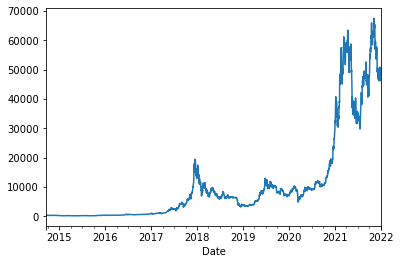

In [11]:
btc_prices.plot()

<AxesSubplot:xlabel='Date'>

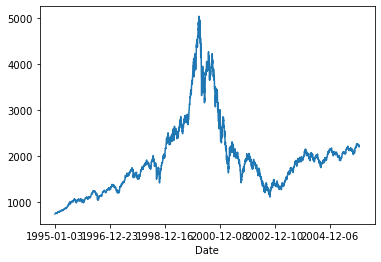

In [12]:
nasdaq_95_Data.plot()

/home/rex/anaconda3/envs/pyvisenv/lib/python3.7/site-packages/ipykernel_launcher.py:19: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`



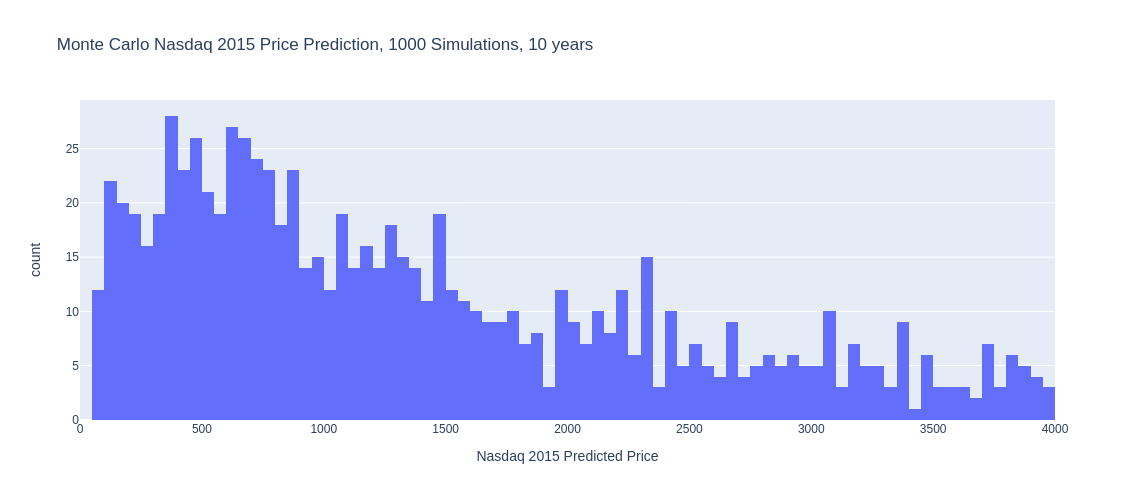

In [44]:
nasdaq_simulation_df_1000 = monte_carlo_simulation(1000,3650,nasdaq_95_Data)
Nasdaq_hist_data_1000 = nasdaq_simulation_df_1000.transpose()
Nasdaq_Monte_Carlo_1000 =  px.histogram(Nasdaq_hist_data_1000,
                                              x=(nasdaq_95_days-1), 
                                              title='Monte Carlo Nasdaq 2015 Price Prediction, 1000 Simulations, 10 years',
                                              nbins=1000,
                                              labels={'3649':"Nasdaq 2015 Predicted Price"},
                                              height=500
                                  )
Nasdaq_Monte_Carlo_1000.update_xaxes(range=[0, 4000])

#Nasdaq_hist_data_1000.iloc[:,-1].describe()

/home/rex/anaconda3/envs/pyvisenv/lib/python3.7/site-packages/ipykernel_launcher.py:19: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`



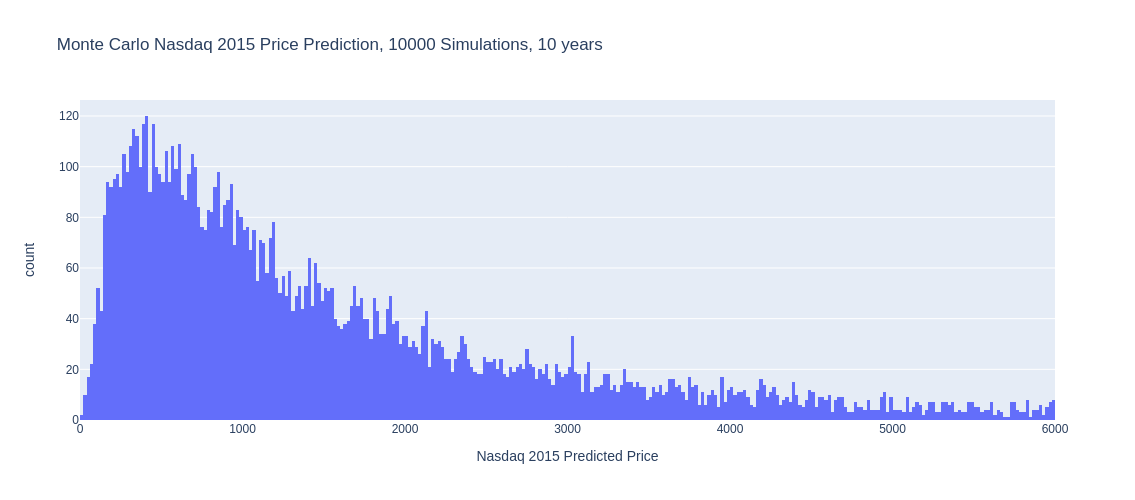

In [47]:
nasdaq_simulation_df_10000= monte_carlo_simulation(10000,3650,nasdaq_95_Data)
Nasdaq_hist_data_10000 = nasdaq_simulation_df_10000.transpose()
Nasdaq_Monte_Carlo_10000 =  px.histogram(Nasdaq_hist_data_10000,
                                              x=(3649), 
                                              title='Monte Carlo Nasdaq 2015 Price Prediction, 10000 Simulations, 10 years',
                                              nbins=5000,
                                             labels={'3649':"Nasdaq 2015 Predicted Price"},
                                              height=500
                                  )
Nasdaq_Monte_Carlo_10000.update_xaxes(range=[0, 6000])



In [49]:
btc_simulation_df_1000 = monte_carlo_simulation(1000,3650,btc_prices)
btc_hist_data_1000 = btc_simulation_df_1000.transpose()
btc_Monte_Carlo_1000 =  px.histogram(btc_hist_data_1000,
                                              x=3649, 
                                              title='Monte Carlo Bitcoin Price Prediction, 1000 Simulations, 10 years',
                                              nbins=50000,
                                              labels={'3649':"Bitcoin Price "},
                                              height=500
                                  )
btc_Monte_Carlo_1000.update_xaxes(range=[0, 30000])
btc_hist_data_1000.iloc[:,-1].describe()

/home/rex/anaconda3/envs/pyvisenv/lib/python3.7/site-packages/ipykernel_launcher.py:19: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`



count    1.000000e+03
mean     8.289209e+04
std      1.096827e+06
min      5.425752e-01
25%      6.078641e+02
50%      3.174653e+03
75%      1.372697e+04
max      3.243726e+07
Name: 3649, dtype: float64

In [48]:
btc_simulation_df_10000 = monte_carlo_simulation(10000,3650,btc_prices)
btc_hist_data_10000 = btc_simulation_df_10000.transpose()
btc_Monte_Carlo_10000 =  px.histogram(btc_hist_data_10000,
                                             x=3649, 
                                              title='Monte Carlo Bitcoin Price Prediction, 10000 Simulations, 10 years',
                                              nbins=50000,
                                             labels={'3649':"Bitcoin Price "},
                                             height=500
                                #  )
btc_Monte_Carlo_10000.update_xaxes(range=[0, 30000])
#btc_hist_data_10000.iloc[:,-1].describe()

/home/rex/anaconda3/envs/pyvisenv/lib/python3.7/site-packages/ipykernel_launcher.py:19: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`



count    1.000000e+04
mean     4.224058e+04
std      3.398266e+05
min      8.355850e-02
25%      5.747814e+02
50%      2.943244e+03
75%      1.417863e+04
max      1.508242e+07
Name: 3649, dtype: float64

/home/rex/anaconda3/envs/pyvisenv/lib/python3.7/site-packages/ipykernel_launcher.py:19: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`



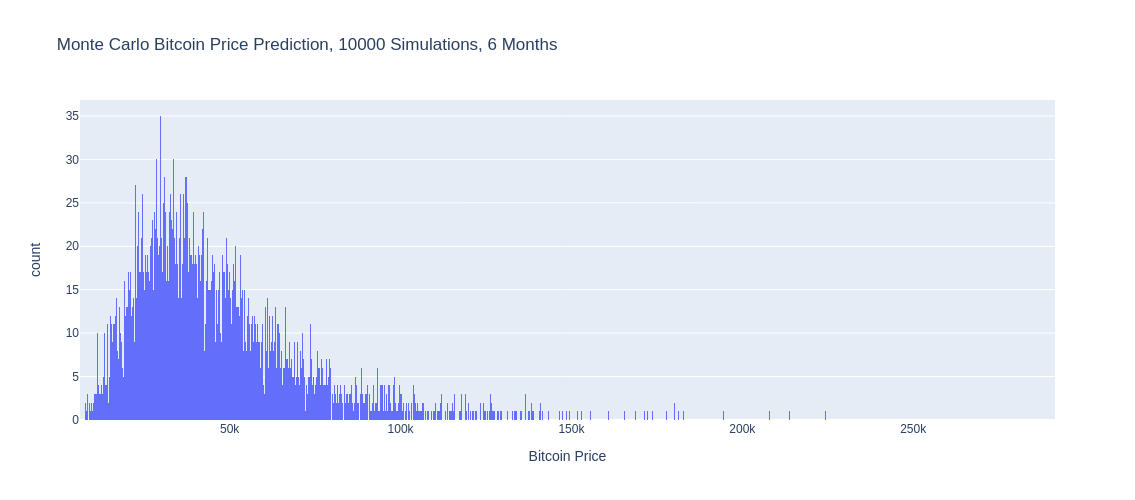

In [28]:
btc_simulation_df_10000 = monte_carlo_simulation(10000,180,btc_prices)
btc_hist_data_10000 = btc_simulation_df_10000.transpose()
btc_Monte_Carlo_10000 =  px.histogram(btc_hist_data_10000,
                                              x=179, 
                                              title='Monte Carlo Bitcoin Price Prediction, 10000 Simulations, 6 Months',
                                              nbins=5000,
                                              labels={'179':"Bitcoin Price "},
                                              height=500
                                  )
btc_Monte_Carlo_10000.show()

/home/rex/anaconda3/envs/pyvisenv/lib/python3.7/site-packages/ipykernel_launcher.py:19: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`



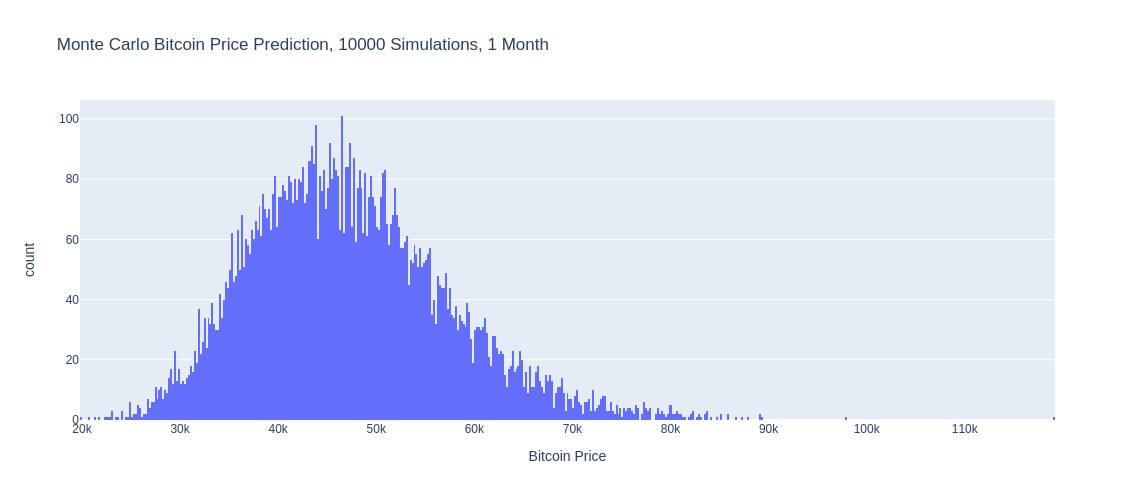

In [29]:
btc_simulation_df_10000 = monte_carlo_simulation(10000,30,btc_prices)
btc_hist_data_10000 = btc_simulation_df_10000.transpose()
btc_Monte_Carlo_10000 =  px.histogram(btc_hist_data_10000,
                                              x=29, 
                                              title='Monte Carlo Bitcoin Price Prediction, 10000 Simulations, 1 Month',
                                              nbins=500,
                                              labels={'29':"Bitcoin Price "},
                                              height=500
                                  )
btc_Monte_Carlo_10000.show()

In [53]:
btc_hist_data_10000.iloc[:,-1].describe()

count    1.000000e+04
mean     4.224058e+04
std      3.398266e+05
min      8.355850e-02
25%      5.747814e+02
50%      2.943244e+03
75%      1.417863e+04
max      1.508242e+07
Name: 3649, dtype: float64

/home/rex/anaconda3/envs/pyvisenv/lib/python3.7/site-packages/ipykernel_launcher.py:19: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`



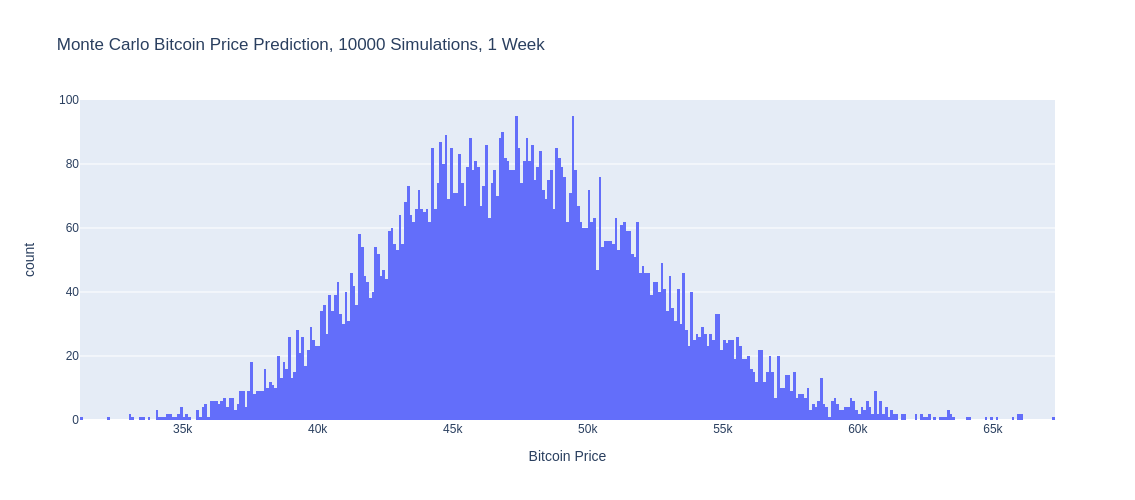

In [57]:
btc_simulation_df_10000 = monte_carlo_simulation(10000,7,btc_prices)
btc_hist_data_10000 = btc_simulation_df_10000.transpose()
btc_Monte_Carlo_10000 =  px.histogram(btc_hist_data_10000,
                                              x=6, 
                                              title='Monte Carlo Bitcoin Price Prediction, 10000 Simulations, 1 Week',
                                              nbins=500,
                                              labels={'6':"Bitcoin Price "},
                                              height=500
                                  )
btc_Monte_Carlo_10000.show()

In [56]:
btc_hist_data_10000.iloc[:,-1].describe()

count    10000.000000
mean     47289.250352
std       4787.025180
min      32194.922680
25%      43886.329076
50%      47145.134634
75%      50465.730756
max      67127.571086
Name: 6, dtype: float64